#MSc Project
**Title :** Pattern Recognition Approaches for Identifying and predicting Stock Market next-day Returns, Close price and Up/Down <br>

**Name:** Deboky Saha <br>
**Student ID:** 001142694 <br>
**Supervisor:** Georgios Samakovitis <br>
**Second Marker:** Christopher Walshaw


**This part of the code is for the implementation of merged stock data**


First the important libaries is imported. To install the Yahoo Finance library for stock several steps are taken.

In [ ]:
!pip install yfinance


In [ ]:
!pip install feature-engine

In [ ]:
# Importing Libraries
# DataFrame library
import pandas as pd

# Yahoo Finance library
import yfinance as yf
import pandas_datareader as web

# Datetime library
import datetime as dt

# Visualisation library
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing library
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from feature_engine.encoding import OneHotEncoder 

# LSTM Model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


### Calculate performance metrics
import math 
from sklearn.metrics import mean_squared_error, r2_score

**Fetching the data from Yahoo Finance**

In [ ]:
tickers_list = ['III.L','BARC.L','BT-A.L','BRBY.L','HSBA.L','LLOY.L','SBRY.L','WPP.L','TSCO.L','EXPN.L']
Stock_Data = yf.download(tickers_list, data_source='yahoo',start='2015-01-01', end='2020-01-01')
print(Stock_Data.head())




[*********************100%***********************]  10 of 10 completed
             Adj Close                           ...    Volume                    
                BARC.L       BRBY.L      BT-A.L  ...    SBRY.L     TSCO.L    WPP.L
Date                                             ...                              
2015-01-02  201.714691  1397.968872  303.599884  ...   6128266   14473912  1759714
2015-01-05  194.704666  1383.334717  297.088776  ...   9609478   24127306  4259770
2015-01-06  191.095963  1379.030762  292.167572  ...   9314969   21147845  4044089
2015-01-07  191.303391  1399.690430  297.845886  ...  23205216   24585173  4010417
2015-01-08  196.654205  1421.210815  302.312775  ...  34260889  119768830  3849047

[5 rows x 60 columns]


In [ ]:
Stock_Data

Adj Close                           ...    Volume                    
                BARC.L       BRBY.L      BT-A.L  ...    SBRY.L     TSCO.L    WPP.L
Date                                             ...                              
2015-01-02  201.714691  1397.968872  303.599884  ...   6128266   14473912  1759714
2015-01-05  194.704666  1383.334717  297.088776  ...   9609478   24127306  4259770
2015-01-06  191.095963  1379.030762  292.167572  ...   9314969   21147845  4044089
2015-01-07  191.303391  1399.690430  297.845886  ...  23205216   24585173  4010417
2015-01-08  196.654205  1421.210815  302.312775  ...  34260889  119768830  3849047
...                ...          ...         ...  ...       ...        ...      ...
2019-12-23  170.076508  2174.315674  194.748840  ...   5025719   13252330  3461343
2019-12-24  170.588272  2162.641602  193.338272  ...   1052614    1943484   487545
2019-12-27  172.009842  2172.369873  193.535553  ...   2355713    7381457  1432396
2019-12-30  170.815720  2160.696045  190.674942  ...   6469414    8904844  1588679
2019-12-31  170.247101  2145.130371  189.826614  ...   1994680    6405384   826644

[1264 rows x 60 columns]

**This python script brings the ticker symbol in one column**

In [ ]:
# Takes 24s to run
total_rows = Stock_Data.shape[0]
print(total_rows)

# Columns of new dataframe- Date, Symbol, Adj Close, Volume
data_list = []

column_list = Stock_Data['Adj Close'].columns
#print(column_list)

for index in range(0, total_rows):
    for column_val in column_list:
        data_list.append([Stock_Data.index[index].date(), column_val, Stock_Data['Adj Close'][column_val][index], Stock_Data['Volume'][column_val][index], Stock_Data['Open'][column_val][index], Stock_Data['Close'][column_val][index], Stock_Data['High'][column_val][index], Stock_Data['Low'][column_val][index]])

new_dataframe_TenStocks = pd.DataFrame(data_list, columns = ['Date','Symbol','Adj Close','Volume', 'Open', 'Close', 'High', 'Low'])
print(new_dataframe_TenStocks)

1264
             Date  Symbol    Adj Close  ...        Close         High          Low
0      2015-01-02  BARC.L   201.714691  ...   243.149994   245.600006   241.550003
1      2015-01-02  BRBY.L  1397.968872  ...  1624.000000  1651.560059  1620.000000
2      2015-01-02  BT-A.L   303.599884  ...   401.000000   404.299988   398.399994
3      2015-01-02  EXPN.L   967.880493  ...  1095.000000  1114.000000  1086.000000
4      2015-01-02  HSBA.L   417.212982  ...   612.000000   615.213989   607.299988
...           ...     ...          ...  ...          ...          ...          ...
12635  2019-12-31   III.L  1027.271729  ...  1098.000000  1111.000000  1091.500000
12636  2019-12-31  LLOY.L    56.213387  ...    62.500000    63.151001    62.299999
12637  2019-12-31  SBRY.L   213.266968  ...   229.899994   235.809998   229.899994
12638  2019-12-31  TSCO.L   248.376587  ...   323.253204   325.621796   321.099792
12639  2019-12-31   WPP.L   966.022400  ...  1066.500000  1076.000000  1060.500000

In [ ]:
new_dataframe_TenStocks

,Date,Symbol,Adj Close,Volume,Open,Close,High,Low
0,2015-01-02,BARC.L,201.714691,20219711,242.199997,243.149994,245.600006,241.550003
1,2015-01-02,BRBY.L,1397.968872,1021764,1650.000000,1624.000000,1651.560059,1620.000000
2,2015-01-02,BT-A.L,303.599884,6228506,403.600006,401.000000,404.299988,398.399994
3,2015-01-02,EXPN.L,967.880493,1971799,1109.000000,1095.000000,1114.000000,1086.000000
4,2015-01-02,HSBA.L,417.212982,12528438,614.700012,612.000000,615.213989,607.299988
...,...,...,...,...,...,...,...,...
12635,2019-12-31,III.L,1027.271729,460111,1109.500000,1098.000000,1111.000000,1091.500000
12636,2019-12-31,LLOY.L,56.213387,51827760,62.880001,62.500000,63.151001,62.299999
12637,2019-12-31,SBRY.L,213.266968,1994680,234.199997,229.899994,235.809998,229.899994
12638,2019-12-31,TSCO.L,248.376587,6405384,322.746490,323.253204,325.621796,321.099792


**Computing Returns**

In [ ]:
new_dataframe_TenStocks['Daily_returns'] = new_dataframe_TenStocks['Adj Close'].pct_change()


**Calculating the next day returns**

In [ ]:
new_dataframe_TenStocks['Output_NextReturns'] = new_dataframe_TenStocks['Daily_returns'].shift(1)

**Calculating the next day closing price**

In [ ]:
new_dataframe_TenStocks['Output_NextClose'] = new_dataframe_TenStocks['Close'].shift(1)

**Computing Up/Down**

In [ ]:
new_dataframe_TenStocks['Output_Up_Down'] = 0
for i in range(new_dataframe_TenStocks.shape[0]-1):
  if (new_dataframe_TenStocks['Close'][i+1]>new_dataframe_TenStocks['Close'][i]):
    new_dataframe_TenStocks['Output_Up_Down'][i+1] = 1 #Up
  else:
    new_dataframe_TenStocks['Output_Up_Down'][i+1] = 0 #Down


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Viewing the new dataset
new_dataframe_TenStocks

,Date,Symbol,Adj Close,Volume,Open,Close,High,Low,Daily_returns,Output_NextReturns,Output_NextClose,Output_Up_Down
0,2015-01-02,BARC.L,201.714691,20219711,242.199997,243.149994,245.600006,241.550003,NaN,NaN,NaN,0
1,2015-01-02,BRBY.L,1397.968872,1021764,1650.000000,1624.000000,1651.560059,1620.000000,5.930427,NaN,243.149994,1
2,2015-01-02,BT-A.L,303.599884,6228506,403.600006,401.000000,404.299988,398.399994,-0.782828,5.930427,1624.000000,0
3,2015-01-02,EXPN.L,967.880493,1971799,1109.000000,1095.000000,1114.000000,1086.000000,2.188013,-0.782828,401.000000,1
4,2015-01-02,HSBA.L,417.212982,12528438,614.700012,612.000000,615.213989,607.299988,-0.568942,2.188013,1095.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12635,2019-12-31,III.L,1027.271729,460111,1109.500000,1098.000000,1111.000000,1091.500000,0.872165,-0.778367,591.900024,1
12636,2019-12-31,LLOY.L,56.213387,51827760,62.880001,62.500000,63.151001,62.299999,-0.945279,0.872165,1098.000000,0
12637,2019-12-31,SBRY.L,213.266968,1994680,234.199997,229.899994,235.809998,229.899994,2.793882,-0.945279,62.500000,1
12638,2019-12-31,TSCO.L,248.376587,6405384,322.746490,323.253204,325.621796,321.099792,0.164628,2.793882,229.899994,1


# Data Pre-processing

**Checking the missing values and resolving the issues**

In [ ]:
Nan_Data = new_dataframe_TenStocks[new_dataframe_TenStocks.isnull().any(axis=1)]
Nan_Data

,Date,Symbol,Adj Close,Volume,Open,Close,High,Low,Daily_returns,Output_NextReturns,Output_NextClose,Output_Up_Down
0,2015-01-02,BARC.L,201.714691,20219711,242.199997,243.149994,245.600006,241.550003,NaN,NaN,NaN,0
1,2015-01-02,BRBY.L,1397.968872,1021764,1650.000000,1624.000000,1651.560059,1620.000000,5.930427,NaN,243.149994,1


In [ ]:
new_dataframe_TenStocks

,Date,Symbol,Adj Close,Volume,Open,Close,High,Low,Daily_returns,Output_NextReturns,Output_NextClose,Output_Up_Down
0,2015-01-02,BARC.L,201.714691,20219711,242.199997,243.149994,245.600006,241.550003,NaN,NaN,NaN,0
1,2015-01-02,BRBY.L,1397.968872,1021764,1650.000000,1624.000000,1651.560059,1620.000000,5.930427,NaN,243.149994,1
2,2015-01-02,BT-A.L,303.599884,6228506,403.600006,401.000000,404.299988,398.399994,-0.782828,5.930427,1624.000000,0
3,2015-01-02,EXPN.L,967.880493,1971799,1109.000000,1095.000000,1114.000000,1086.000000,2.188013,-0.782828,401.000000,1
4,2015-01-02,HSBA.L,417.212982,12528438,614.700012,612.000000,615.213989,607.299988,-0.568942,2.188013,1095.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12635,2019-12-31,III.L,1027.271729,460111,1109.500000,1098.000000,1111.000000,1091.500000,0.872165,-0.778367,591.900024,1
12636,2019-12-31,LLOY.L,56.213387,51827760,62.880001,62.500000,63.151001,62.299999,-0.945279,0.872165,1098.000000,0
12637,2019-12-31,SBRY.L,213.266968,1994680,234.199997,229.899994,235.809998,229.899994,2.793882,-0.945279,62.500000,1
12638,2019-12-31,TSCO.L,248.376587,6405384,322.746490,323.253204,325.621796,321.099792,0.164628,2.793882,229.899994,1


In [ ]:
# Creating a smaller dataframe which contains the numerical features to perform imputation
DataFrame_Smaller = new_dataframe_TenStocks[['Adj Close','Volume','Open','Close','High','Low','Daily_returns','Output_NextReturns','Output_NextClose','Output_Up_Down']]


In [ ]:
# KNN Imputer
impute_missing_knn = KNNImputer(n_neighbors=5)
Data_TenStocks_Filling = pd.DataFrame(impute_missing_knn.fit_transform(DataFrame_Smaller))

In [ ]:
Data_TenStocks_Filling

,0,1,2,3,4,5,6,7,8,9
0,201.714691,20219711.0,242.199997,243.149994,245.600006,241.550003,-0.328518,5.636755,971.560001,0.0
1,1397.968872,1021764.0,1650.000000,1624.000000,1651.560059,1620.000000,5.930427,-0.680189,243.149994,1.0
2,303.599884,6228506.0,403.600006,401.000000,404.299988,398.399994,-0.782828,5.930427,1624.000000,0.0
3,967.880493,1971799.0,1109.000000,1095.000000,1114.000000,1086.000000,2.188013,-0.782828,401.000000,1.0
4,417.212982,12528438.0,614.700012,612.000000,615.213989,607.299988,-0.568942,2.188013,1095.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12635,1027.271729,460111.0,1109.500000,1098.000000,1111.000000,1091.500000,0.872165,-0.778367,591.900024,1.0
12636,56.213387,51827760.0,62.880001,62.500000,63.151001,62.299999,-0.945279,0.872165,1098.000000,0.0
12637,213.266968,1994680.0,234.199997,229.899994,235.809998,229.899994,2.793882,-0.945279,62.500000,1.0
12638,248.376587,6405384.0,322.746490,323.253204,325.621796,321.099792,0.164628,2.793882,229.899994,1.0


In [ ]:
#New DataFrame is created after filling the missing values
Attributes = ['Adj Close','Volume','Open','Close','High','Low','Daily_returns','Output_NextReturns','Output_NextClose','Output_Up_Down']
DataFrame_TenStocks_Updated = pd.DataFrame(Data_TenStocks_Filling.values,columns=Attributes)

In [ ]:
DataFrame_TenStocks_Updated

,Adj Close,Volume,Open,Close,High,Low,Daily_returns,Output_NextReturns,Output_NextClose,Output_Up_Down
0,201.714691,20219711.0,242.199997,243.149994,245.600006,241.550003,-0.328518,5.636755,971.560001,0.0
1,1397.968872,1021764.0,1650.000000,1624.000000,1651.560059,1620.000000,5.930427,-0.680189,243.149994,1.0
2,303.599884,6228506.0,403.600006,401.000000,404.299988,398.399994,-0.782828,5.930427,1624.000000,0.0
3,967.880493,1971799.0,1109.000000,1095.000000,1114.000000,1086.000000,2.188013,-0.782828,401.000000,1.0
4,417.212982,12528438.0,614.700012,612.000000,615.213989,607.299988,-0.568942,2.188013,1095.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
12635,1027.271729,460111.0,1109.500000,1098.000000,1111.000000,1091.500000,0.872165,-0.778367,591.900024,1.0
12636,56.213387,51827760.0,62.880001,62.500000,63.151001,62.299999,-0.945279,0.872165,1098.000000,0.0
12637,213.266968,1994680.0,234.199997,229.899994,235.809998,229.899994,2.793882,-0.945279,62.500000,1.0
12638,248.376587,6405384.0,322.746490,323.253204,325.621796,321.099792,0.164628,2.793882,229.899994,1.0


**Viewing the correlations**

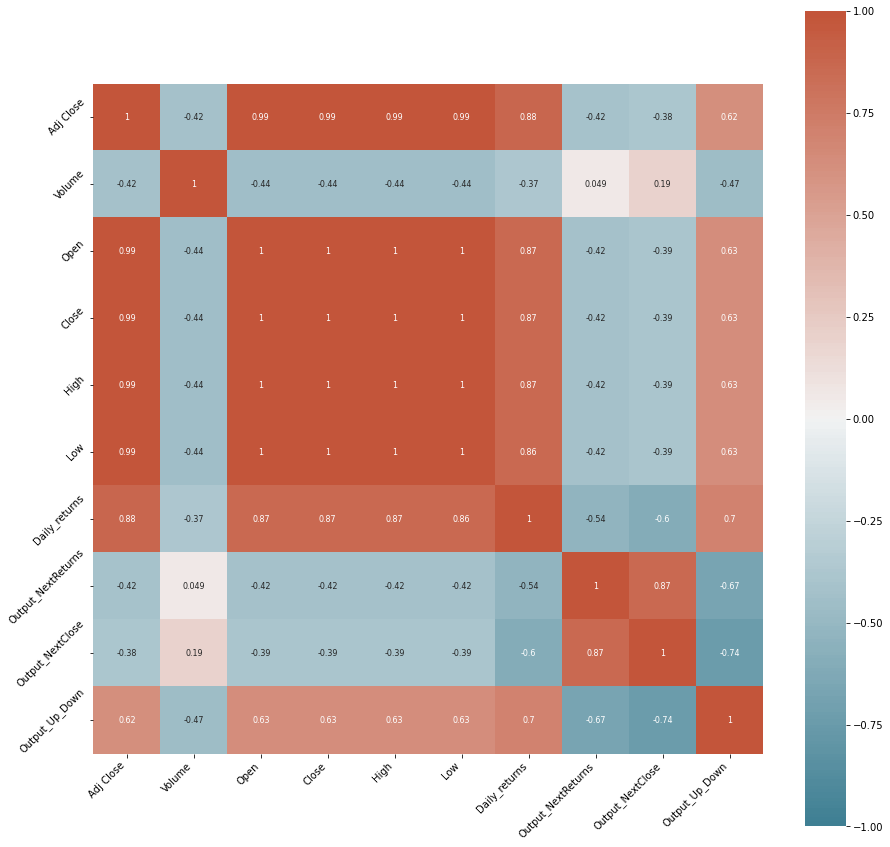

In [ ]:
plt.figure(figsize=(15, 15))
corr = DataFrame_TenStocks_Updated.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True,
                 annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [ ]:
# Symbol column have been extracted and joined with the updated dataframe
Extracted_Column = new_dataframe_TenStocks['Symbol']
Extracted_Column
DataFrame_TenStocks_Updated_WithSymbols = DataFrame_TenStocks_Updated.join(Extracted_Column, how='left')

In [ ]:
DataFrame_TenStocks_Updated_WithSymbols

,Adj Close,Volume,Open,Close,High,Low,Daily_returns,Output_NextReturns,Output_NextClose,Output_Up_Down,Symbol
0,201.714691,20219711.0,242.199997,243.149994,245.600006,241.550003,-0.328518,5.636755,971.560001,0.0,BARC.L
1,1397.968872,1021764.0,1650.000000,1624.000000,1651.560059,1620.000000,5.930427,-0.680189,243.149994,1.0,BRBY.L
2,303.599884,6228506.0,403.600006,401.000000,404.299988,398.399994,-0.782828,5.930427,1624.000000,0.0,BT-A.L
3,967.880493,1971799.0,1109.000000,1095.000000,1114.000000,1086.000000,2.188013,-0.782828,401.000000,1.0,EXPN.L
4,417.212982,12528438.0,614.700012,612.000000,615.213989,607.299988,-0.568942,2.188013,1095.000000,0.0,HSBA.L
...,...,...,...,...,...,...,...,...,...,...,...
12635,1027.271729,460111.0,1109.500000,1098.000000,1111.000000,1091.500000,0.872165,-0.778367,591.900024,1.0,III.L
12636,56.213387,51827760.0,62.880001,62.500000,63.151001,62.299999,-0.945279,0.872165,1098.000000,0.0,LLOY.L
12637,213.266968,1994680.0,234.199997,229.899994,235.809998,229.899994,2.793882,-0.945279,62.500000,1.0,SBRY.L
12638,248.376587,6405384.0,322.746490,323.253204,325.621796,321.099792,0.164628,2.793882,229.899994,1.0,TSCO.L


feature-engine is a libray which needs to be installed

In [ ]:
!pip install feature-engine

     |████████████████████████████████| 205 kB 10.0 MB/s 
     |████████████████████████████████| 9.8 MB 61.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
DataFrame_TenStocks_Updated_WithSymbols['Symbol'].unique()

array(['BARC.L', 'BRBY.L', 'BT-A.L', 'EXPN.L', 'HSBA.L', 'III.L',
       'LLOY.L', 'SBRY.L', 'TSCO.L', 'WPP.L'], dtype=object)

In [ ]:
# The input and output features are defined

Input_Features = ['Adj Close','Volume','Daily_returns','Symbol']

# Three outputs are Up/Down, Next Day closing price and next day returns
Y_UD = DataFrame_TenStocks_Updated_WithSymbols['Output_Up_Down']
Y_CP = DataFrame_TenStocks_Updated_WithSymbols['Output_NextClose']
Y_R =  DataFrame_TenStocks_Updated_WithSymbols['Output_NextReturns']
X = DataFrame_TenStocks_Updated_WithSymbols[Input_Features]


X.head()


,Adj Close,Volume,Daily_returns,Symbol
0,201.714691,20219711.0,-0.328518,BARC.L
1,1397.968872,1021764.0,5.930427,BRBY.L
2,303.599884,6228506.0,-0.782828,BT-A.L
3,967.880493,1971799.0,2.188013,EXPN.L
4,417.212982,12528438.0,-0.568942,HSBA.L


**Splitting for Next Day close**

In [ ]:
X_Train_CP, X_Val_CP, y_Train_Output_CP, y_Val_Output_CP= train_test_split(X,Y_CP,test_size = 0.20,shuffle=False)


**Performing one hot encoding**

In [ ]:
# # to split the Dataset
# from sklearn.model_selection import train_test_split


Encoding_Symbols = OneHotEncoder(
    top_categories=10,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=['Symbol'],
    drop_last=False)

Encoding_Symbols.fit(X_Train_CP)




OneHotEncoder(top_categories=10, variables=['Symbol'])

In [ ]:
# Transforming the data
X_train_CP1 = Encoding_Symbols.transform(X_Train_CP)
X_test_CP1 = Encoding_Symbols.transform(X_Val_CP)

# let's explore the result
X_train_CP1.head()

,Adj Close,Volume,Daily_returns,Symbol_BRBY.L,Symbol_BARC.L,Symbol_TSCO.L,Symbol_WPP.L,Symbol_III.L,Symbol_LLOY.L,Symbol_HSBA.L,Symbol_SBRY.L,Symbol_EXPN.L,Symbol_BT-A.L
0,201.714691,20219711.0,-0.328518,0,1,0,0,0,0,0,0,0,0
1,1397.968872,1021764.0,5.930427,1,0,0,0,0,0,0,0,0,0
2,303.599884,6228506.0,-0.782828,0,0,0,0,0,0,0,0,0,1
3,967.880493,1971799.0,2.188013,0,0,0,0,0,0,0,0,1,0
4,417.212982,12528438.0,-0.568942,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_Train_Output_CP.head()

0     971.560001
1     243.149994
2    1624.000000
3     401.000000
4    1095.000000
Name: Output_NextClose, dtype: float64

**Box-Cox Transformation will be used for this project as it resembles normal distribution which is important in time series analysis.**

In [ ]:
from sklearn.preprocessing import PowerTransformer


Power_Transformer_For_Stock_X = PowerTransformer() # Different features are in different scale and thus bringing them in one scale is crucial
Power_Transformer_For_Stock_y = PowerTransformer() # Output1 is the price and has thus it needs to come to a certain scale

#Transforming the training input dataset 
X_Train_CP_PT = Power_Transformer_For_Stock_X.fit_transform(X_train_CP1)

#Transforming the validation input dataset 
X_Val_CP_PT = Power_Transformer_For_Stock_X.fit_transform(X_test_CP1)


#Transforming the training output dataset 
y_Train_reshape = y_Train_Output_CP.values.reshape(-1, 1)
y_Train_Output_PT = Power_Transformer_For_Stock_y.fit_transform(y_Train_reshape)


#Transforming the validation output dataset 
y_Val_Output_reshape = y_Val_Output_CP.values.reshape(-1, 1)
y_Val_Output_PT = Power_Transformer_For_Stock_y.fit_transform(y_Val_Output_reshape)





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


#LSTM Model

In [ ]:

X_Train_LSTM_reshape = X_Train_CP_PT.reshape(-1, 1, 13) # 13 input features from which 10 is the result of one hot encoding of 10 ticker symbol
X_Val_LSTM_reshape  = X_Val_CP_PT.reshape(-1, 1, 13) # 13 input features from which 10 is the result of one hot encoding of 10 ticker symbol
y_Train_Output_LSTM_reshape = y_Train_Output_PT.reshape(-1, 1, 1) # The output has two values
y_Val_Output_LSTM_reshape = y_Val_Output_PT.reshape(-1, 1, 1) # The output has two values


Model_LSTM_CP = Sequential()  
# First LSTM Layer with Dropout regularisation
Model_LSTM_CP.add(LSTM(units = 70,input_shape=(1,13),recurrent_activation= 'hard_sigmoid',return_sequences=True))
Model_LSTM_CP.add(Dropout(0.2))
# Second LSTM Layer 
Model_LSTM_CP.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_CP.add(Dropout(0.2))
# Third LSTM Layer 
Model_LSTM_CP.add(LSTM(units = 70,return_sequences=True))
Model_LSTM_CP.add(Dropout(0.2))
# Fourth LSTM Layer  
Model_LSTM_CP.add(LSTM(units = 70))
Model_LSTM_CP.add(Dropout(0.2))
# The Output Layer as it has two outputs (Next Returns, Up/Down)
Model_LSTM_CP.add(Dense(units=1))

# Compiling the RNN
Model_LSTM_CP.compile(loss='mean_absolute_error', optimizer='rmsprop')

# Fitting to the training set

History_LSTM = Model_LSTM_CP.fit(X_Train_LSTM_reshape,y_Train_Output_LSTM_reshape,validation_data=(X_Val_LSTM_reshape,y_Val_Output_LSTM_reshape),epochs=100,batch_size=64,verbose=1)

# Takes 3 minutes to execute this cell

Epoch 1/100
158/158 [==============================] - 10s 17ms/step - loss: 0.2814 - val_loss: 0.1908
Epoch 2/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1615 - val_loss: 0.1738
Epoch 3/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1482 - val_loss: 0.1703
Epoch 4/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1375 - val_loss: 0.1484
Epoch 5/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1308 - val_loss: 0.1745
Epoch 6/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1268 - val_loss: 0.1676
Epoch 7/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1212 - val_loss: 0.1658
Epoch 8/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1188 - val_loss: 0.1618
Epoch 9/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1150 - val_loss: 0.1521
Epoch 10/100
158/158 [==============================] - 1s 8ms/step - loss: 0.1112 - val_

In [ ]:
Model_LSTM_CP.summary()

**Prediction on train and test dataset**

In [ ]:
train_predict_CP = Model_LSTM_CP.predict(X_Train_LSTM_reshape)
test_predict_CP = Model_LSTM_CP.predict(X_Val_LSTM_reshape)

In [ ]:
# Prediction of the model on the test data set


rmse_LSTM_CP = math.sqrt(mean_squared_error(y_Val_Output_PT,test_predict_CP))
print(f'RMSE of LSTM for Closing price: {rmse_LSTM_CP}.')

mse_LSTM_CP = mean_squared_error(y_Val_Output_PT,test_predict_CP)
print(f'MSE of LSTM for Closing price: {mse_LSTM_CP}.')

r2_LSTM_CP = r2_score(y_Val_Output_PT,test_predict_CP)
print(f'R2 of LSTM for Closing price: {r2_LSTM_CP}.')


**Plotting Model Loss**

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(History_LSTM.history['loss'], label='Train loss')
plt.plot(History_LSTM.history['val_loss'], label='Test loss')
plt.title('Model loss for next day closing price with 15 stocks')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

**Saving the model**

In [ ]:
Model_LSTM.save('LSTM_Model_Ten_Stocks.h5')